In [1]:
import numpy as np
from numpy import linalg as lg
import matplotlib.pyplot as plt

In [2]:
A = np.matrix(np.genfromtxt('A.csv', delimiter=','))
b = np.matrix(np.genfromtxt('b.csv', delimiter=',')).T

In [3]:
np.all(A == A.T)

True

In [4]:
np.all(lg.eigvals(A)>0)

True

In [5]:
def correct_solve(A,b):
    L=lg.cholesky(A)
    y=L.I*b
    x=(L.T).I*y
    return x
x_cor=correct_solve(A,b).astype(np.float32)
lenx=len(x_cor)

In [6]:
lg.cond(A)

417817.0320093094

In [7]:
A = np.matrix(np.genfromtxt('A.csv', delimiter=',', dtype=np.float32))
b = np.matrix(np.genfromtxt('b.csv', delimiter=',', dtype=np.float32)).T

In [8]:
C=np.matrix(np.diag(np.sqrt(np.diag(A))))
Cinv=C.I
A_=Cinv*A*Cinv.T
b_=Cinv*b
lg.cond(A_)

1160.4958

In [9]:
D = np.matrix(np.diag(np.diag(A)))
T = D.I * (D-A)
np.max(np.abs(np.linalg.eigvals(T)))

2.5600646

In [10]:
D = np.matrix(np.diag(np.diag(A_)))
T = D.I * (D-A_)
np.max(np.abs(np.linalg.eigvals(T)))

2.5600646

In [11]:
D = np.matrix(np.diag(np.diag(A)))
U = np.triu(A)-D
L = np.tril(A)-D
T = (L+D).I*U
np.max(np.abs(np.linalg.eigvals(T)))

0.9938648

In [12]:
D = np.matrix(np.diag(np.diag(A_)))
U = np.triu(A_)-D
L = np.tril(A_)-D
T = (L+D).I*U
np.max(np.abs(np.linalg.eigvals(T)))

0.9938649

In [39]:
def jacobi(A, b, n=3, pred=False, ones=False):
    min_it=10
    stop=10**n
    D = np.matrix(np.diag(np.diag(A)))
    Dinv=D.I
    T = Dinv * (D-A)
    if ones:
        x_1 = np.ones_like(b)
        if pred: x_1=Cinv.T*x_1
    else: x_1 = np.zeros_like(b)
    c = Dinv * b
    rel = []
    nev = []
    eps=1e-15
    while True:
        x=c-T*x_1
        d=lg.norm(abs(x - x_1))/lg.norm(abs(x))
        x_1=x
        if pred:
            rel.append(lg.norm(Cinv.T*x - x_cor)/np.sqrt(lenx))
            nev.append((lg.norm(C*b-C*A*(C).T*Cinv.T*x)/np.sqrt(lenx)))
        else:
            rel.append(lg.norm(x - x_cor)/np.sqrt(lenx))
            nev.append((lg.norm(b-A*x)/np.sqrt(lenx)))
        if (rel[-1]>stop or d<eps) and (len(rel)>min_it): break 
    if pred: return Cinv.T*x, rel, nev     
    return x, rel, nev

In [40]:
def gauss_seidel(A, b, pred=False):
    min_it=10
    max_it=100
    D = np.matrix(np.diag(np.diag(A)))
    U = np.triu(A)-D
    L = np.tril(A)-D
    LDinv=(L+D).I
    T = LDinv*U 
    x_1 = np.ones_like(b)
    c = LDinv * b
    rel = []
    nev = []
    eps=12e-5
    for i in range(max_it):
        x=c-T*x_1
        x_1=x
        if pred:
            rel.append(lg.norm(Cinv.T*x - x_cor)/np.sqrt(lenx))
            nev.append((lg.norm(C*b-C*A*(C).T*Cinv.T*x)/np.sqrt(lenx)))
        else:
            rel.append(lg.norm(x - x_cor)/np.sqrt(lenx))
            nev.append((lg.norm(b-A*x)/np.sqrt(lenx)))
        #if (rel[-1]<eps) and (len(rel)>min_it): break 
    if pred: return Cinv.T*x, rel, nev     
    return x, rel, nev

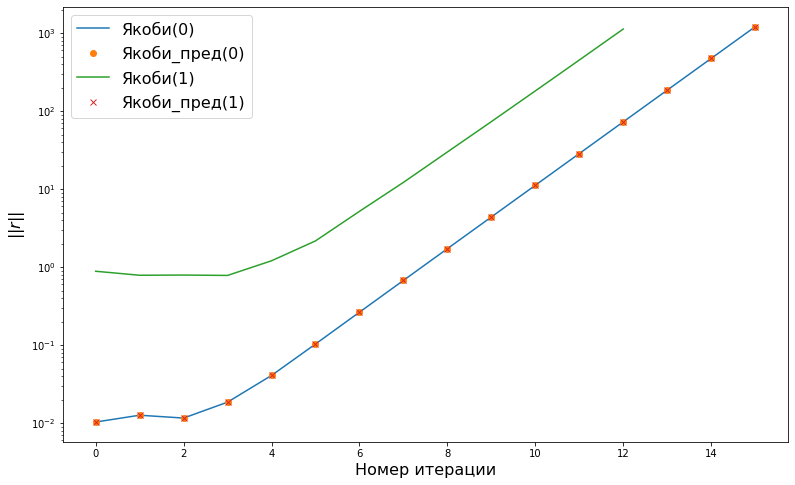

In [38]:
x_j,rel_j,nev_j=jacobi(A,b,3)
x_j_p,rel_j_p,nev_j_p=jacobi(A_,b_,3, pred=True)
x_j_1,rel_j_1,nev_j_1=jacobi(A,b,3, ones=True)
x_j_p_1,rel_j_p_1,nev_j_p_1=jacobi(A_,b_,3, pred=True, ones=True)
fig, ax = plt.subplots(1, 1, figsize=(13, 8))
ax.set_xlabel("Номер итерации", fontsize=16)
ax.set_ylabel("$||r||$", fontsize=16)
ax.plot(rel_j, label="Якоби(0)")
ax.plot(rel_j_p, 'o', label="Якоби_пред(0)")
ax.plot(rel_j_1, label="Якоби(1)")
ax.plot(rel_j_p_1, 'x', label="Якоби_пред(1)")
ax.legend(fontsize=16)
plt.yscale('log')
plt.savefig("jac1.svg", format='svg')

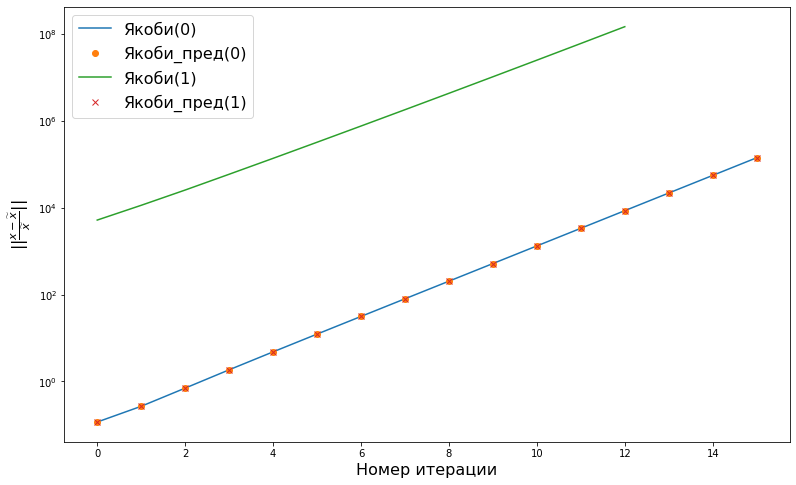

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(13, 8))
ax.set_xlabel("Номер итерации", fontsize=16)
ax.set_ylabel(r"$||\frac{x-\widetilde{x}}{\widetilde{x}}||$", fontsize=16)
ax.plot(nev_j, label="Якоби(0)")
ax.plot(nev_j_p, 'o', label="Якоби_пред(0)")
ax.plot(nev_j_1, label="Якоби(1)")
ax.plot(nev_j_p_1, 'x', label="Якоби_пред(1)")
ax.legend(fontsize=16)
plt.yscale('log')
plt.savefig("jac2.svg", format='svg')

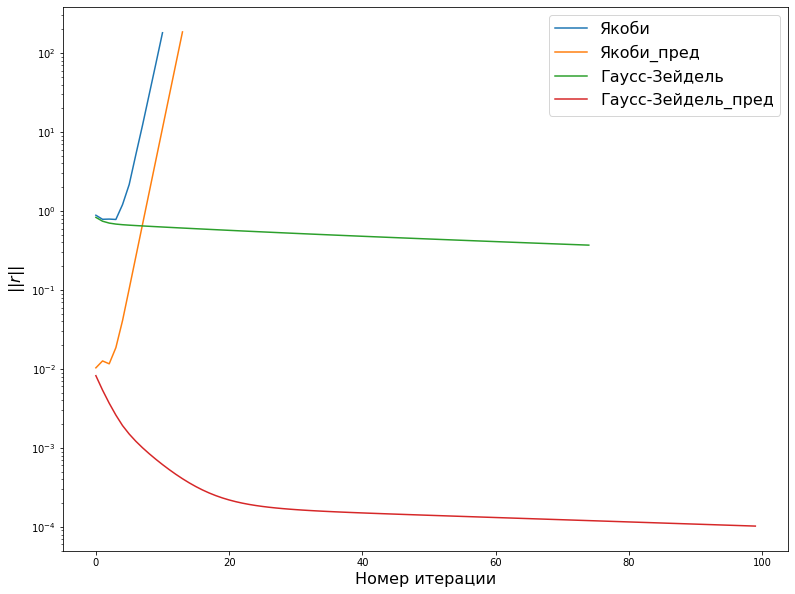

In [42]:
x_j,rel_j,nev_j=jacobi(A,b,2, ones=True)
x_j_p,rel_j_p,nev_j_p=jacobi(A_,b_,2, pred=True, ones=True)
x_g,rel_g,nev_g=gauss_seidel(A,b)
x_g_p,rel_g_p,nev_g_p=gauss_seidel(A_,b_, pred=True)
fig, ax = plt.subplots(1, 1, figsize=(13, 10))
ax.set_xlabel("Номер итерации", fontsize=16)
ax.set_ylabel("$||r||$", fontsize=16)
ax.plot(rel_j, label="Якоби")
ax.plot(rel_j_p, label="Якоби_пред", markersize=4)
ax.plot(rel_g[:75], label="Гаусс-Зейдель")
ax.plot(rel_g_p, label="Гаусс-Зейдель_пред", markersize=4)
ax.legend(fontsize=16)
plt.yscale('log')
plt.savefig("all.svg", format='svg')

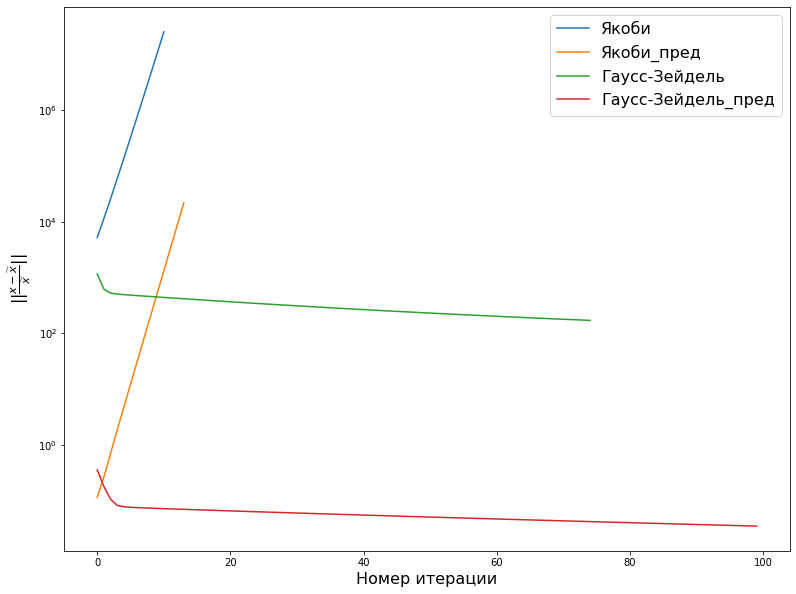

In [43]:
x_j,rel_j,nev_j=jacobi(A,b,2, ones=True)
x_j_p,rel_j_p,nev_j_p=jacobi(A_,b_,2, pred=True, ones=True)
x_g,rel_g,nev_g=gauss_seidel(A,b)
x_g_p,rel_g_p,nev_g_p=gauss_seidel(A_,b_, pred=True)
fig, ax = plt.subplots(1, 1, figsize=(13, 10))
ax.set_xlabel("Номер итерации", fontsize=16)
ax.set_ylabel(r"$||\frac{x-\widetilde{x}}{\widetilde{x}}||$", fontsize=16)
ax.plot(nev_j, label="Якоби")
ax.plot(nev_j_p, label="Якоби_пред", markersize=4)
ax.plot(nev_g[:75], label="Гаусс-Зейдель")
ax.plot(nev_g_p, label="Гаусс-Зейдель_пред", markersize=4)
ax.legend(fontsize=16)
plt.yscale('log')
plt.savefig("all1.svg", format='svg')

In [19]:
import matplotlib.colors as color

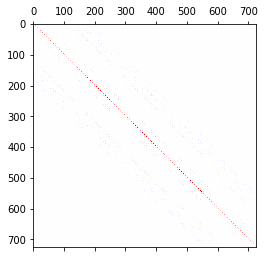

In [20]:
def visualize_matrix(A):
    max_mat=max(np.max(A), abs(np.min(A)))
    norm=color.Normalize(vmin=-max_mat, vmax=max_mat)
    plt.matshow(A, cmap='bwr', norm=norm)
visualize_matrix(A)
plt.savefig("matrix1.svg", format='svg')

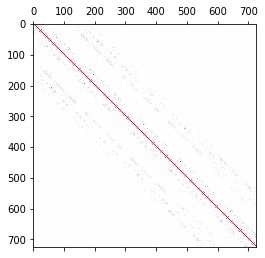

In [21]:
visualize_matrix(A_)
plt.savefig("matrix2.svg", format='svg')

In [22]:
for i in range(1,A.shape[0]//2):
    for j in np.diag(A, k=i):
        if abs(j)>1e-15:
            w=i
            break
2*w+1

377

In [23]:
class SparseMatrix:
    def __init__(self,A):
        self._nonzero=[]
        self._colnums=[]
        self._count=[]
        self._count.append(0)
        for i in range(0, A.shape[0]):
            for j in range(0, A.shape[1]):
                if (abs(A[i,j]) > 1e-15):
                    self._nonzero.append(A[i,j])
                    self._colnums.append(j)
            self._count.append(len(self._colnums))
        self._count=np.array(self._count)
        self._nonzero=np.array(self._nonzero)
        self._colnums=np.array(self._colnums)
    def __mul__(self, b):
        n=len(self._count)-1 
        res=np.zeros(n)
        for i in range(n):
            for k in range(self._count[i], self._count[i+1]):
                res[i] = res[i] + self._nonzero[k]*b[self._colnums[k]]
        return np.matrix(res).T

In [24]:
As=SparseMatrix(A)
As_=SparseMatrix(A_)

In [45]:
def conjugate_gradient_method(A, b, An, pred=False): #An - матрица в оригинале
    max_it=100   #An не нужна для самого метода, но нужна для фиксации невязки
    x_1 = np.matrix(np.ones_like(b))           #в случае с предобуславливанием
    r_1 = b - A*x_1
    v = r_1.copy()
    rel = []
    nev = []
    for i in range(max_it):
        t = float((r_1.T * r_1) / (v.T * (A * v)))
        x = x_1 + t * v
        r = r_1 - t * (A * v)
        s = float((r.T*r) / (r_1.T*r_1))
        v = r + s * v
        if pred:
            rel.append(lg.norm(Cinv.T*x - x_cor)/np.sqrt(lenx))
            nev.append((lg.norm(C*b-C*An*(C).T*Cinv.T*x)/np.sqrt(lenx)))
        else:
            rel.append(lg.norm(x - x_cor)/np.sqrt(lenx))
            nev.append((lg.norm(b-An*x)/np.sqrt(lenx)))
        r_1 = r
        x_1 = x

    if pred: return  Cinv.T*x,rel,nev
    return x,rel,nev

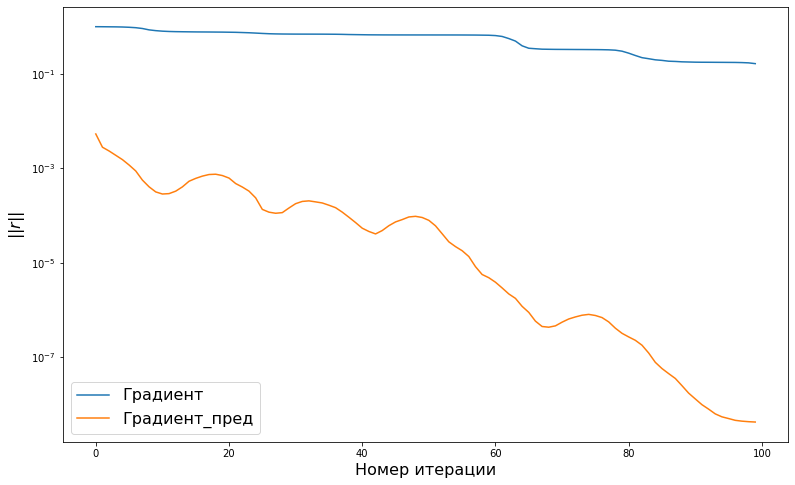

In [46]:
x_gr,rel_gr,nev_gr=conjugate_gradient_method(As,b,A)
x_gr_p,rel_gr_p,nev_gr_p=conjugate_gradient_method(As_,b_,A_, pred=True)
fig, ax = plt.subplots(1, 1, figsize=(13, 8))
ax.set_xlabel("Номер итерации", fontsize=16)
ax.set_ylabel("$||r||$", fontsize=16)
ax.plot(rel_gr, label="Градиент")
ax.plot(rel_gr_p, label="Градиент_пред")
ax.legend(fontsize=16)
plt.yscale('log')
plt.savefig("grad1.svg", format='svg')

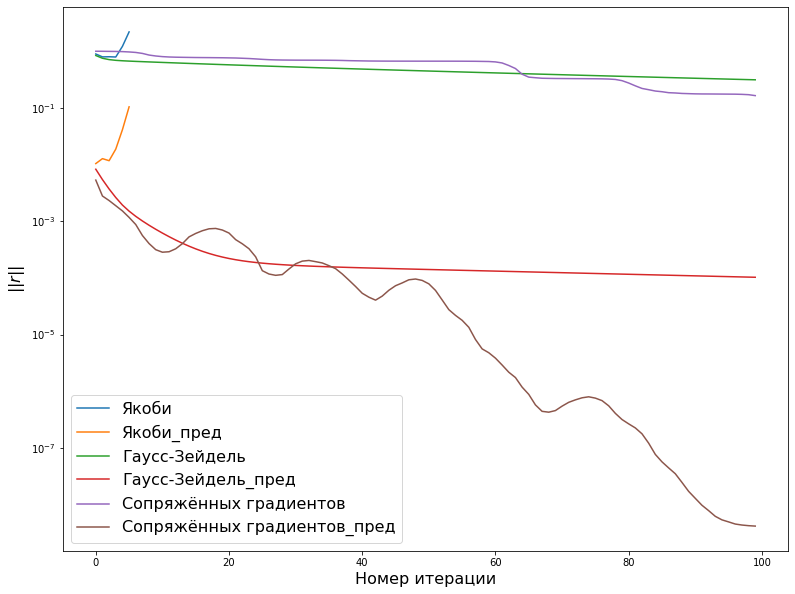

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(13, 10))
ax.set_xlabel("Номер итерации", fontsize=16)
ax.set_ylabel("$||r||$", fontsize=16)
ax.plot(rel_j[:6], label="Якоби")
ax.plot(rel_j_p[:6], label="Якоби_пред")
ax.plot(rel_g, label="Гаусс-Зейдель")
ax.plot(rel_g_p, label="Гаусс-Зейдель_пред")
ax.plot(rel_gr, label="Сопряжённых градиентов")
ax.plot(rel_gr_p, label="Сопряжённых градиентов_пред")
ax.legend(fontsize=16)
plt.yscale('log')
plt.savefig("allall1.svg", format='svg')

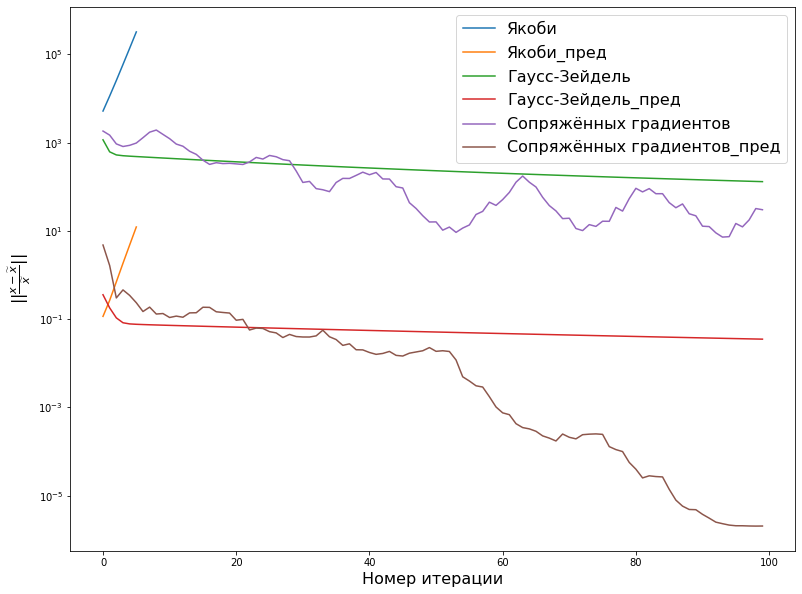

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(13, 10))
ax.set_xlabel("Номер итерации", fontsize=16)
ax.set_ylabel(r"$||\frac{x-\widetilde{x}}{\widetilde{x}}||$", fontsize=16)
ax.plot(nev_j[:6], label="Якоби")
ax.plot(nev_j_p[:6], label="Якоби_пред")
ax.plot(nev_g, label="Гаусс-Зейдель")
ax.plot(nev_g_p, label="Гаусс-Зейдель_пред")
ax.plot(nev_gr, label="Сопряжённых градиентов")
ax.plot(nev_gr_p, label="Сопряжённых градиентов_пред")
ax.legend(fontsize=16)
plt.yscale('log')
plt.savefig("allall2.svg", format='svg')